In [1]:
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29

    pytz (>=2011n)
         ~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install langchain-groq

    pytz (>=2011n)
         ~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install sentence-transformers

    pytz (>=2011n)
         ~~~~~~~^

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
GROQ_API_KEY = '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'

## Main

In [7]:
import pandas as pd
from langchain_openai import ChatOpenAI
from crewai_tools import tool
from crewai import Crew, Task, Agent

GROQ_API_KEY = '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'

# Initialize the language model
# llm = ChatOpenAI(
#     openai_api_base="https://api.groq.com/openai/v1",
#     api_key=GROQ_API_KEY,
#     model_name="mixtral-8x7b-32768",
#     temperature=0.1,
#     max_tokens=1000,
# )

llm = ChatGroq(
    api_key=GROQ_API_KEY,
    model_name="mixtral-8x7b-32768",
    temperature=0.1,
    max_tokens=1000,
)

# Define the tool that generates Python code based on the natural language query
@tool
def code_generation_tool(query):
    """Tool for generating Python code based on a natural language query"""
    prompt = (
        f"Based on the following query, generate Python code to retrieve data from a CSV file: {query}\n"
        "Use the pandas library to load the dataset, filter the data according to the query conditions, "
        "and return the relevant rows.\n"
        "Don't try make your own columns use only which are mentioned in query.\n"
        "Make sure the code is correctly structured and uses appropriate syntax for data manipulation in pandas."
    )
    response = llm.generate_code(prompt)  # Assuming the LLM can handle code generation directly
    return response

# Create the agent responsible for generating the code
CodeGenerator_Agent = Agent(
    role='CodeGenerator',
    goal='Generate Python code to fetch data from the dataset based on the user query',
    backstory=(
        "You are an expert at writing Python code to extract relevant information from datasets, use default dataset name as 'dataset.csv'."
        "Your job is to interpret the user's natural language query and convert it into Python code that retrieves data from a CSV file."
        "Only use column name and value names as mentioned in user's natural language query."
    ),
    verbose=True,
    allow_delegation=False,
    llm=llm,
)

# Create the task for the agent to analyze the query and generate the code
code_generation_task = Task(
    description=(
        "Interpret the following natural language query: {query} "
        "and generate Python code that retrieves relevant data from a CSV file using the pandas library. "
        "Ensure the code handles data filtering based on the query conditions."
    ),
    expected_output=(
        "A block of executable Python code that retrieves and filters the specified data from the CSV file "
        "using pandas."
    ),
    agent=CodeGenerator_Agent,
    # tools=[code_generation_tool],
)

# Setup the Crew with the CodeGenerator_Agent
new_crew = Crew(
    agents=[CodeGenerator_Agent],
    tasks=[code_generation_task],
    verbose=True,
)

# Example input to test the code generation task
inputs = {"query": "give me data whose age is greater than 20 and less than 30 and who lives in New York c"}
# Trigger the crew to perform the code generation task
result = new_crew.kickoff(inputs=inputs)

# Assuming the result contains the generated code in the expected format
generated_code = result

# Print the generated code
print("\nGenerated Python Code:")
print(generated_code)


2024-11-22 10:40:22,241 - 19964 - __init__.py-__init__:521 - WARNING: Overriding of current TracerProvider is not allowed


 [DEBUG]: == Working Agent: CodeGenerator
 [INFO]: == Starting Task: Interpret the following natural language query: give me data whose age is greater than 20 and less than 30 and who lives in New York c and generate Python code that retrieves relevant data from a CSV file using the pandas library. Ensure the code handles data filtering based on the query conditions.


> Entering new CrewAgentExecutor chain...


2024-11-22 10:40:34,451 - 2252 - __init__.py-__init__:370 - ERROR: Exception while exporting Span batch.
Traceback (most recent call last):
  File "D:\PROGRAM FILES\lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
  File "D:\PROGRAM FILES\lib\site-packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "D:\PROGRAM FILES\lib\socket.py", line 955, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\PROGRAM FILES\lib\site-packages\urllib3\connectionpool.py", line 793, in urlopen
    response = self._make_request(
  File "D:\PROGRAM FILES\lib\site-packages\urllib3\connectionpool.py", line 491, in _make_request
    raise new_e
  File "D:\PR

APIConnectionError: Connection error.

In [144]:
# 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
# give me name of users whose age is between 20 to 25 and plays cricket sport

In [32]:
def extract_code_from_response(response: str) -> str:
    start_marker = "```python"
    end_marker = "```"
    
    start_index = response.find(start_marker)
    end_index = response.find(end_marker, start_index + len(start_marker))

    if start_index != -1 and end_index != -1:
        code = response[start_index + len(start_marker):end_index].strip()
        return code
    else:
        print("Code block not found in the response.")
        return ""

response = extract_code_from_response(generated_code)
print(response)

import pandas as pd

# Read the CSV file
dataset = pd.read_csv('dataset.csv')

# Filter the data based on the given conditions
filtered_data = dataset[(dataset['age'] > 20) & (dataset['age'] < 30) & (dataset['city'] == 'New York')]

# Display the filtered data
print(filtered_data)


In [33]:
# Function to execute the generated code
def execute_generated_code(code: str, file_name='sample_data.csv'):
    try:
        # Replace the placeholder file name with the actual file name
        updated_code = code.replace('dataset.csv', file_name)
        
        # Execute the code safely (in a controlled environment)
        exec(updated_code, globals())
    except Exception as e:
        print(f"Error executing the generated code: {e}")

# Execute the generated code to fetch data from the CSV file
execute_generated_code(response)

    name  age      city       occupation
0  Alice   28  New York         Engineer
6  Grace   29  New York  Product Manager


In [17]:
VisualizationGenerator_Agent = Agent(
    role='VisualizationGenerator',
    goal='Generate Python code for data visualizations based on the user query',
    backstory=(
        "You are an expert in data visualization using Python. Your task is to interpret the user's natural language query and "
        "generate code to create visualizations using libraries like matplotlib, seaborn, or plotly."
    ),
    verbose=True,
    allow_delegation=False,
    llm=llm
)

visualization_generation_task = Task(
    description=(
        "Interpret the natural language query: {query} "
        "and generate Python code to create a visualization that represents the data accurately."
    ),
    expected_output=(
        "A block of Python code that uses visualization libraries like matplotlib, seaborn, or plotly "
        "to create the required charts or graphs based on the retrieved data."
    ),
    agent=VisualizationGenerator_Agent,
)

new_crew = Crew(
    agents=[CodeGenerator_Agent, VisualizationGenerator_Agent],
    tasks=[code_generation_task, visualization_generation_task],
    verbose=True,
)

inputs = {"query": "Create a bar chart of sales by product category"}

result = new_crew.kickoff(inputs=inputs)

generated_visualization_code = result

print("Generated Visualization Code:")
print(generated_visualization_code)


2024-10-21 12:15:59,632 - 21144 - __init__.py-__init__:521 - WARNING: Overriding of current TracerProvider is not allowed


 [DEBUG]: == Working Agent: CodeGenerator
 [INFO]: == Starting Task: Interpret the following natural language query: Create a bar chart of sales by product category and generate Python code that retrieves relevant data from a CSV file using the pandas library. Ensure the code handles data filtering based on the query conditions.


> Entering new CrewAgentExecutor chain...
To create a bar chart of sales by product category, I first need to filter the dataset based on the product category column and then calculate the sum of sales for each category. After that, I can use the pandas plotting function to create a bar chart. Here is the Python code that accomplishes this task:

Final Answer:
```python
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset.csv')

# Filter the dataset based on the product category column
df_filtered = df[df['product_category'] == 'category_name']

# Calculate the sum of sales for each category
sales_by_category = df_filtered['sales'].sum()

# Creat

2024-11-22 10:42:37,794 - 19964 - __init__.py-__init__:521 - WARNING: Overriding of current TracerProvider is not allowed
2024-11-22 10:42:37,801 - 19964 - __init__.py-__init__:521 - WARNING: Overriding of current TracerProvider is not allowed


 [DEBUG]: == Working Agent: CodeGenerator
 [INFO]: == Starting Task: Interpret the following natural language query: give me data which have price greater than 10000000 and have minimum 2 bedrooms and generate Python code that retrieves relevant data from a CSV file using the pandas library.


> Entering new CrewAgentExecutor chain...
To fulfill the task, I need to perform the following steps:
1. Import the pandas library
2. Load the 'Housing.csv' file using pandas
3. Filter the data based on the conditions given in the query

Here's the final answer:

Final Answer:
```python
import pandas as pd

# Load the 'Housing.csv' file using pandas
data = pd.read_csv('Housing.csv')

# Filter the data based on the conditions given in the query
filtered_data = data[(data['price'] > 10000000) & (data['bedrooms'] >= 2)]

# Print the filtered data
print(filtered_data)
```
This code will load the 'Housing.csv' file into a pandas DataFrame and filter the data based on the conditions given in the query.

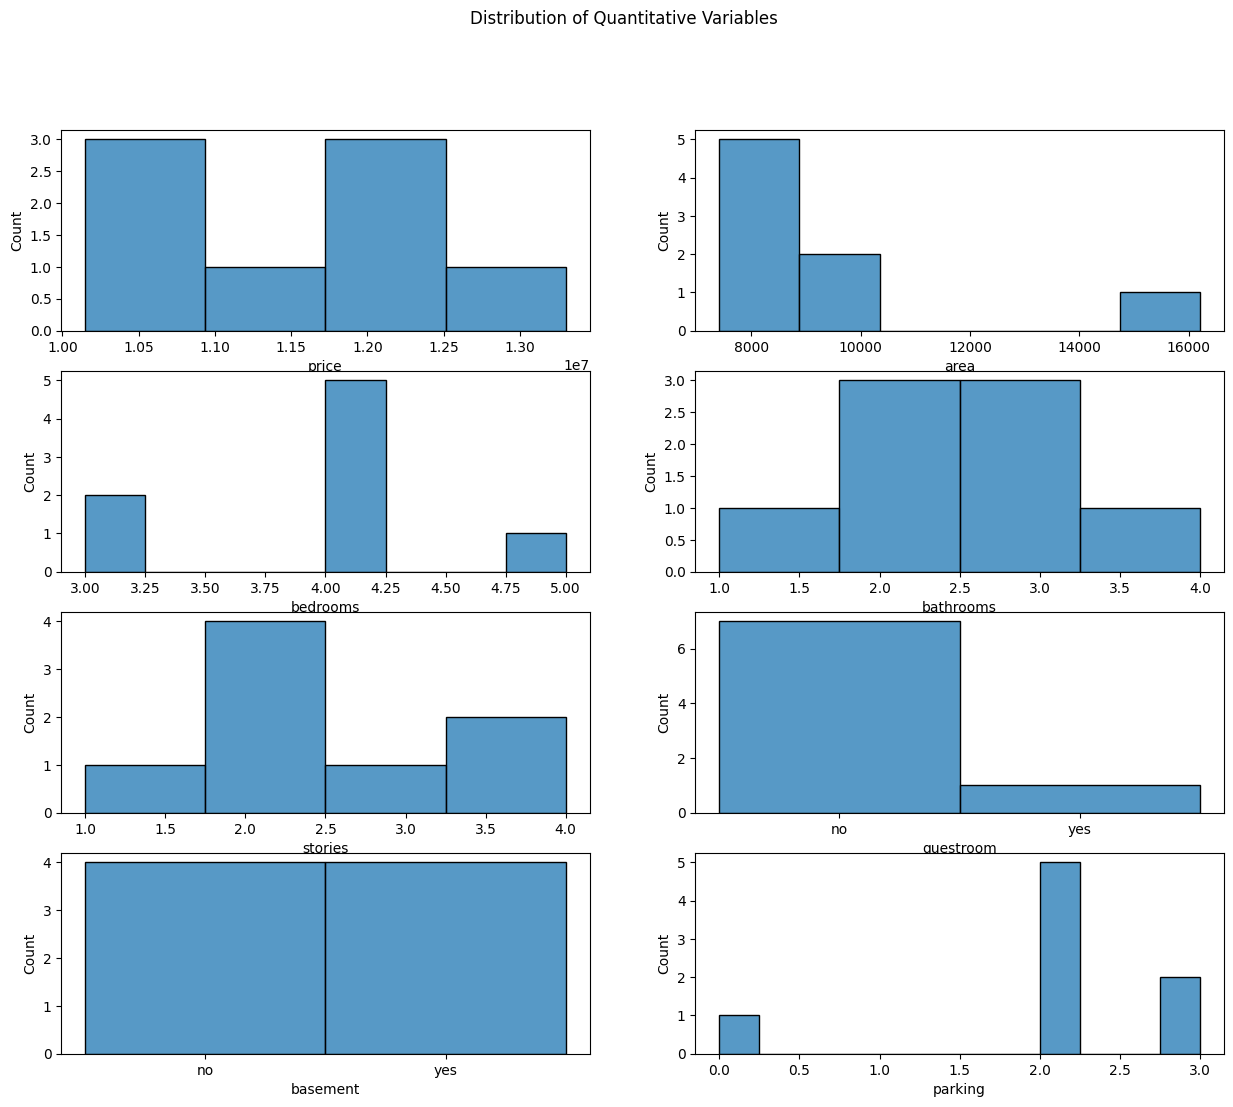

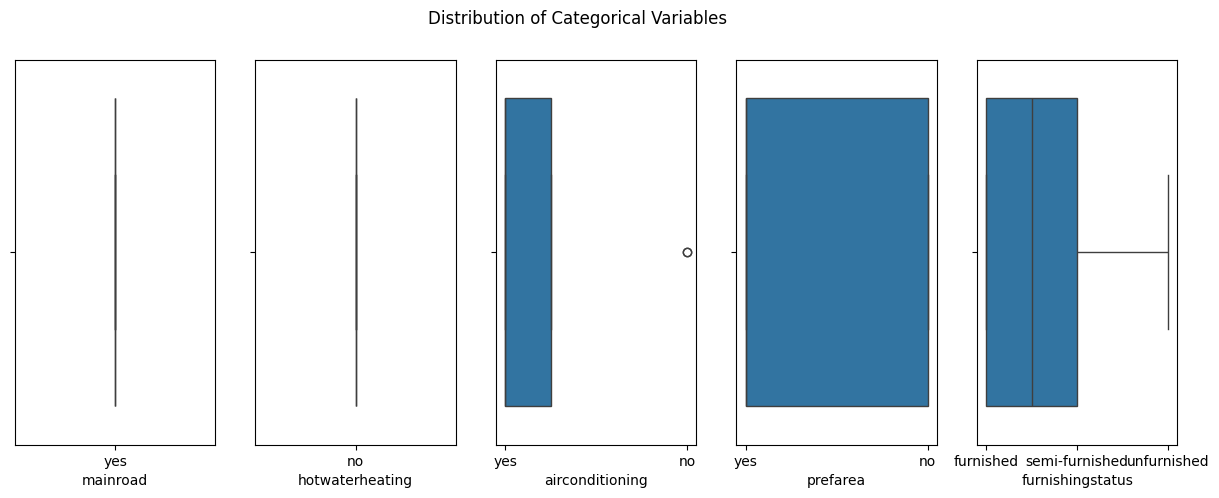

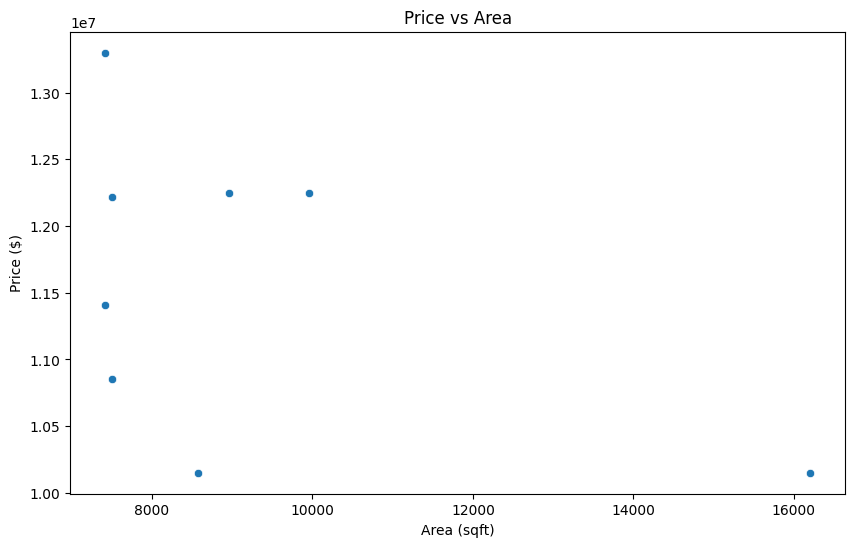

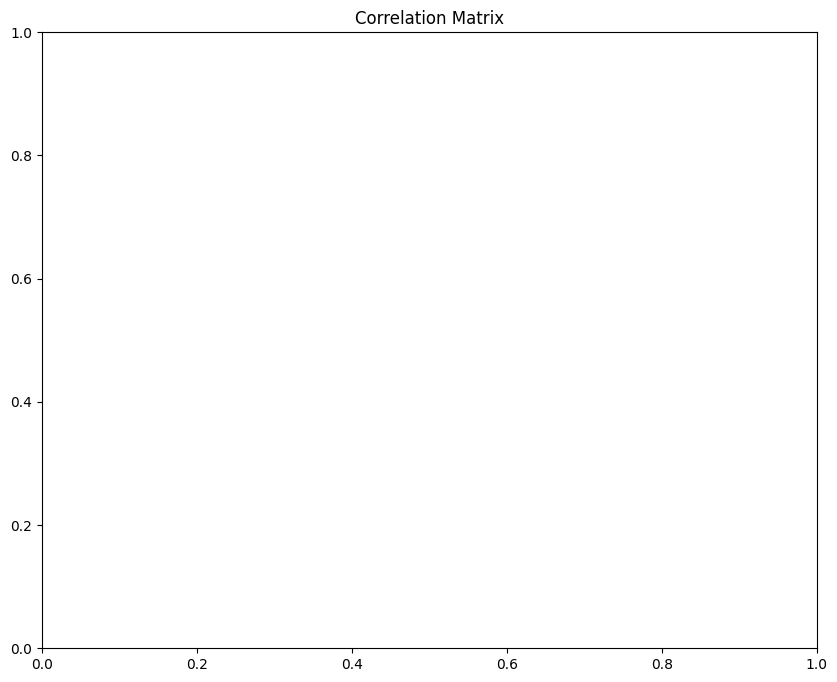

In [8]:
import pandas as pd
from langchain_openai import ChatOpenAI
from crewai_tools import tool
from crewai import Crew, Task, Agent
from langchain_groq import ChatGroq

GROQ_API_KEY = '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'

# llm = ChatOpenAI(
#     # openai_api_base="https://api.groq.com/openai/v1",
#     api_key=GROQ_API_KEY,
#     model_name="mixtral-8x7b-32768",
#     temperature=0.1,
#     max_tokens=1000,
# )

llm = ChatGroq(
    api_key=GROQ_API_KEY,
    model_name="mixtral-8x7b-32768",
    temperature=0.1,
    max_tokens=1000,
)


def extract_code_from_response(response: str) -> str:
    start_marker = "```python"
    end_marker = "```"
    
    start_index = response.find(start_marker)
    end_index = response.find(end_marker, start_index + len(start_marker))

    if start_index != -1 and end_index != -1:
        code = response[start_index + len(start_marker):end_index].strip()
        return code
    else:
        print("Code block not found in the response.")
        return ""


def execute_data_retrieval_code(code: str, file_name='Housing.csv'):
    try:
        updated_code = code.replace('dataset.csv', file_name)
        # print("Executing the following data retrieval code:\n", updated_code)
        local_vars = {}
        exec(updated_code, globals(), local_vars)
        
        if 'filtered_data' in local_vars:
            return local_vars['filtered_data']
        else:
            print("filtered_df not found in the generated code's execution.")
            return None
    except Exception as e:
        print(f"Error executing the data retrieval code: {e}")
        return None


def execute_visualization_code(code: str, data):
    try:
        local_vars = {'data': data} 
        print(code)
        exec(code, globals(), local_vars)

    except Exception as e:
        print(f"Error executing the visualization code: {e}")


CodeGenerator_Agent = Agent(
    role='CodeGenerator',
    goal='Generate Python code to fetch data from the dataset based on the user query',
    backstory=(
        "You are an expert at writing Python code to extract relevant information from datasets." 
        "Use only the provided file name and column names when generating code. The file name is '{file_name}', so include it exactly as given."
    ),
    verbose=True,
    allow_delegation=False,
    llm=llm,
)


VisualizationGenerator_Agent = Agent(
    role='VisualizationGenerator',
    goal='Generate Python code for creating data visualizations based on the retrieved data',
    backstory=(
        "You are an expert in data visualization using Python. After the data has been retrieved based on the user's query, "
        "your task is to generate code that creates appropriate various visualizations using libraries like matplotlib, seaborn, or plotly."
        "You should focus on representing the data in a way that is insightful and easy to understand."
        "You must use the provided data to generate the code dont create your own data"
    ),
    verbose=True,
    allow_delegation=False,
    llm=llm,
)


code_generation_task = Task(
    description=(
        "Interpret the following natural language query: {query} "
        "and generate Python code that retrieves relevant data from a CSV file using the pandas library."
    ),
    expected_output=(
        "A block of executable Python code that retrieves and filters the specified data from the CSV file using pandas."
        "The output must in between ``` ``` tags"
    ),
    agent=CodeGenerator_Agent,
)


visualization_generation_task = Task(
    description=(
        "Given the following data columns: {columns}, generate Python code to create a unique visualizations that represents the data accurately."
    ),
    expected_output=(
        "A block of Python code that uses visualization libraries like matplotlib, seaborn, or plotly "
        "to create the required charts or graphs based on the retrieved data."
        "The output must in between ``` ``` tags"
    ),
    agent=VisualizationGenerator_Agent,
)


crew1 = Crew(
    agents=[CodeGenerator_Agent],
    tasks=[code_generation_task],
    verbose=True,
)


crew2 = Crew(
    agents=[VisualizationGenerator_Agent],
    tasks=[visualization_generation_task],
    verbose=True,
)


def automate_data_to_visualization(query: str, file_name='Housing.csv'):
    filtered_data = pd.read_csv(file_name)
    columns = ', '.join(filtered_data.columns)
    inputs = {"query": query, "file_name": file_name, "columns": columns}
    data_result = crew1.kickoff(inputs=inputs)
    generated_code = extract_code_from_response(data_result)
    print(generated_code,"\n")

    filtered_data = execute_data_retrieval_code(generated_code, file_name=file_name)

    if filtered_data is not None:
        columns = ', '.join(filtered_data.columns)
        visualization_query = f"Create a visualization for the retrieved data with columns: {columns} and data is stored in data variable"
        vis_inputs = {"columns": visualization_query}
        visualization_result = crew2.kickoff(inputs=vis_inputs)
        print(visualization_result)
        generated_visualization_code = extract_code_from_response(visualization_result)

        execute_visualization_code(generated_visualization_code, filtered_data)

automate_data_to_visualization(query="give me data which have price greater than 10000000 and have minimum 2 bedrooms")

2024-11-22 22:41:41,635 - 18916 - __init__.py-__init__:521 - WARNING: Overriding of current TracerProvider is not allowed
2024-11-22 22:41:41,640 - 18916 - __init__.py-__init__:521 - WARNING: Overriding of current TracerProvider is not allowed


Kicking off the Code Generation Task...
 [DEBUG]: == Working Agent: CodeGenerator
 [INFO]: == Starting Task: Interpret the following natural language query: Find properties that offer both a basement and a guest room. and generate Python code that retrieves relevant data from a CSV file Housing.csv using the pandas library. Use only provided column names ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'] for generating code to fetch the data and do not generate or use any other column names. Ensure that the entire dataset is loaded into a variable named 'data', and the final filtered data must always be stored in a variable named 'filtered_data'. Do not use any other variable names for the filtered data. Handle case-insensitivity only for categorical columns and directly compare numerical columns without string operations. Check the datatypes of columns and categoriz

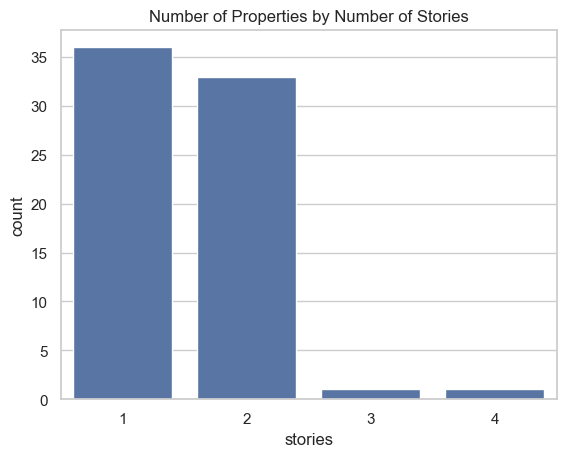

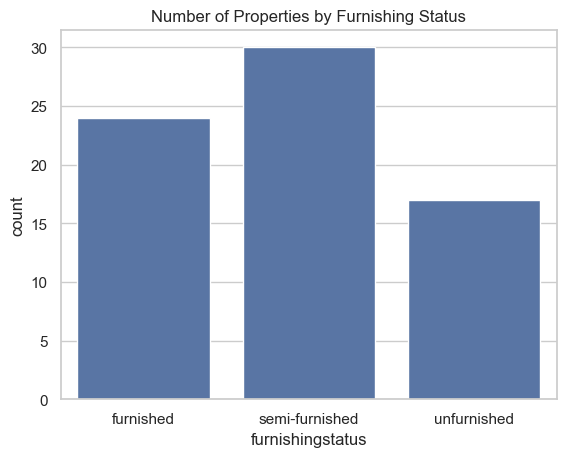

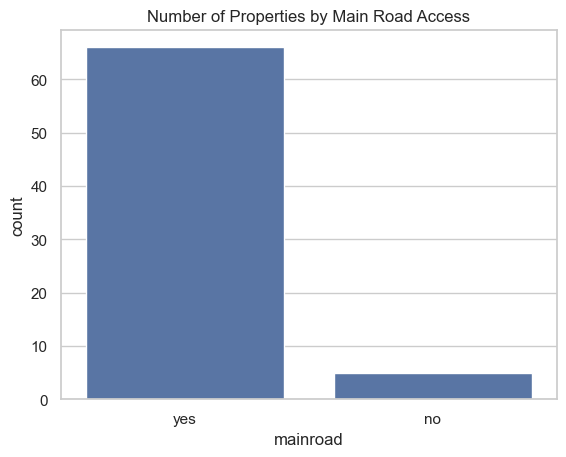

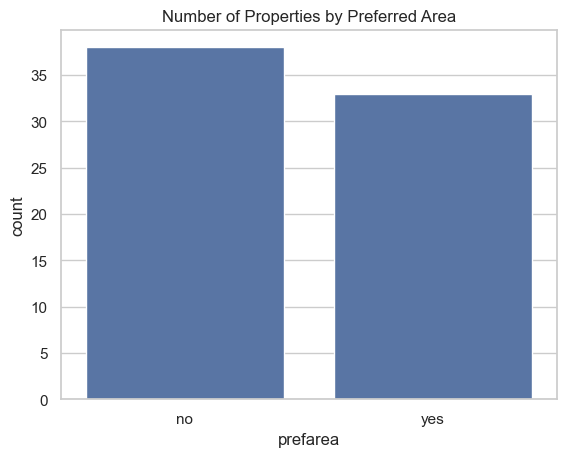

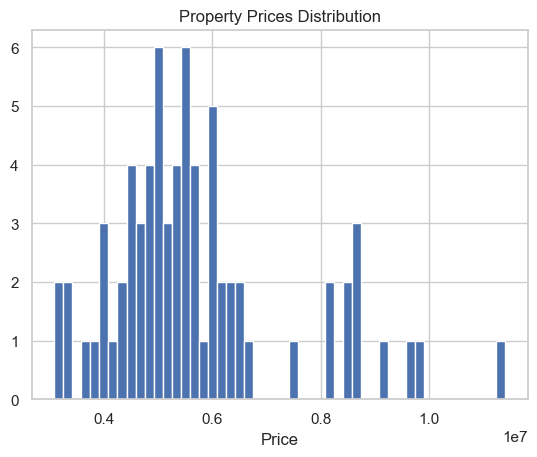

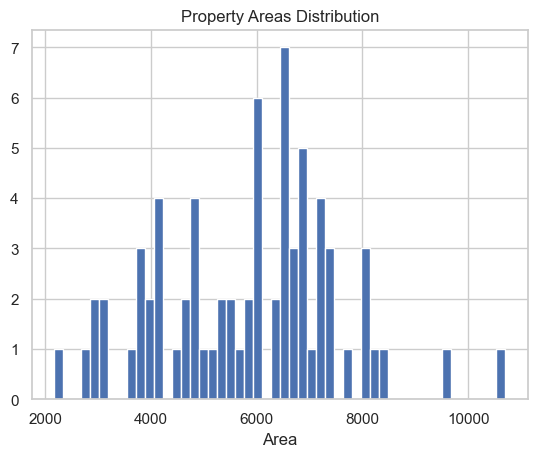

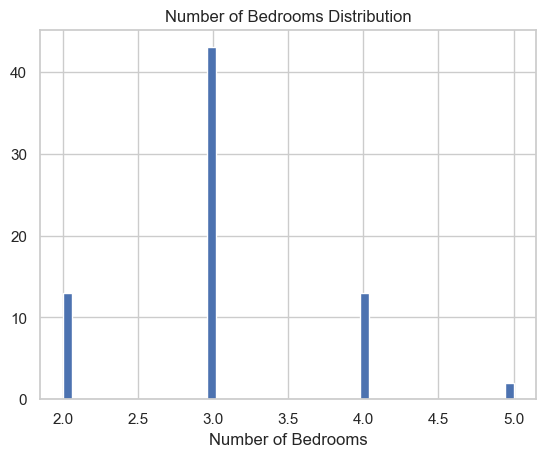

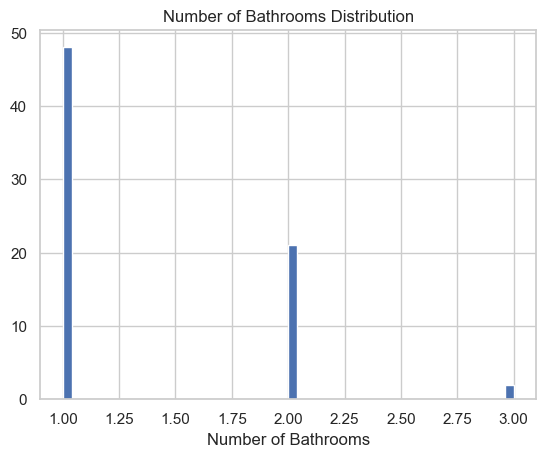

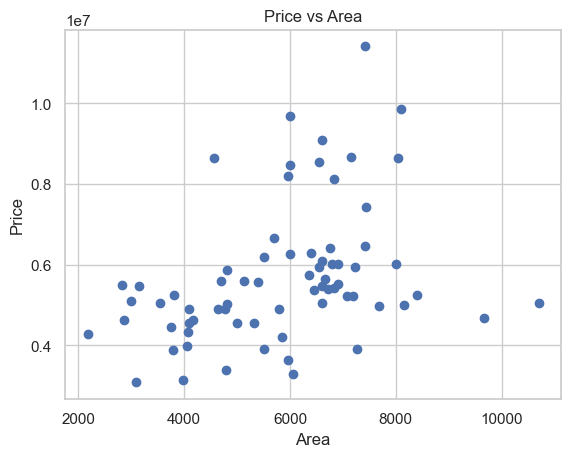

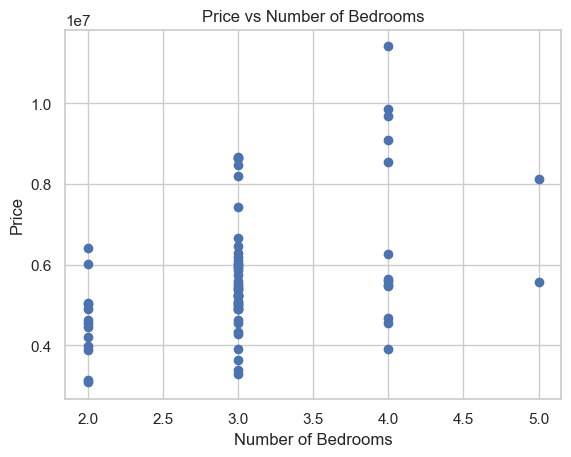

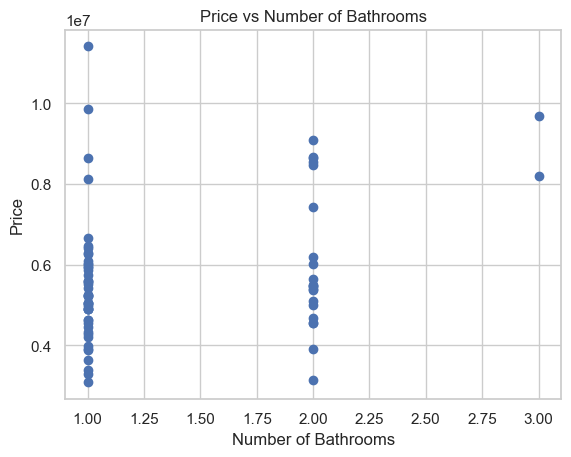

Visualization successfully generated.


In [23]:
import pandas as pd
from langchain_openai import ChatOpenAI
from crewai_tools import tool
from crewai import Crew, Task, Agent
from langchain_groq import ChatGroq

GROQ_API_KEY = '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'

llm = ChatGroq(
    api_key=GROQ_API_KEY,
    model_name="mixtral-8x7b-32768",
    temperature=0.1,
    max_tokens=1000,
)


# Extract the code template part
def extract_code_from_response(response: str) -> str:
    start_marker = "```python"
    end_marker = "```"
    
    start_index = response.find(start_marker)
    end_index = response.find(end_marker, start_index + len(start_marker))

    if start_index != -1 and end_index != -1:
        code = response[start_index + len(start_marker):end_index].strip()
        return code
    else:
        print("Code block not found in the response.")
        return ""


# Execute the code for data fetching
def execute_data_retrieval_code(code: str, file_name='Housing.csv'):
    try:
        updated_code = code.replace('dataset.csv', file_name)
        print("Executing the data retrieval code...")
        local_vars = {}
        exec(updated_code, globals(), local_vars)
        
        if 'filtered_data' in local_vars:
            print("Data retrieval successful.")
            return local_vars['filtered_data']
        else:
            print("filtered_data not found in the generated code's execution.")
            return None
    except Exception as e:
        print(f"Error executing the data retrieval code: {e}")
        return None


# Execute the visualization code
def execute_visualization_code(code: str, data):
    try:
        local_vars = {'data': data} 
        print("Executing the visualization code...")
        exec(code, globals(), local_vars)
        print("Visualization successfully generated.")
    except Exception as e:
        print(f"Error executing the visualization code: {e}")


# Data fetching code generator agent
CodeGenerator_Agent = Agent(
    role='CodeGenerator',
    goal='Generate Python code to fetch data from the dataset based on the user query.',
    backstory=(
        "You are an expert at writing Python code to extract relevant information from datasets. "
        "The dataset file is '{file_name}', and all column names must be referenced exactly as provided in the dataset. "
        "Always wrap the generated code in a ` ```python ` block followed by the code and ending with ` ``` `. "
        "The complete data must be loaded into the 'data' variable, and the final filtered results must always be stored "
        "in a variable named 'filtered_data'. Do not use any other variable names for the filtered results."
    ),
    verbose=True,
    allow_delegation=False,
    llm=llm,
)

# Visualization code generator agent
VisualizationGenerator_Agent = Agent(
    role='VisualizationGenerator',
    goal='Generate Python code for creating data visualizations based on the retrieved data',
    backstory=(
        "You are an expert in data visualization using Python. After the data has been retrieved based on the user's query, "
        "your task is to generate code that creates appropriate various visualizations using libraries like matplotlib, seaborn, or plotly. "
        "You should focus on representing the data in a way that is insightful and easy to understand. "
        "You must use the provided data to generate the code and not create your own data. "
        "Always wrap the generated code in a ` ```python ` block followed by the code and ending with ` ``` `."
    ),
    verbose=True,
    allow_delegation=False,
    llm=llm,
)

# Task definitions
code_generation_task = Task(
    description=(
        "Interpret the following natural language query: {query} "
        "and generate Python code that retrieves relevant data from a CSV file {file_name} using the pandas library. "
        "Use only provided column names {columns} for generating code to fetch the data and do not generate or use any other column names. "
        "Ensure that the entire dataset is loaded into a variable named 'data', and the final filtered data must always be stored "
        "in a variable named 'filtered_data'. Do not use any other variable names for the filtered data. "
        "Handle case-insensitivity only for categorical columns and directly compare numerical columns without string operations. "
        "Check the datatypes of columns and categorize them into categorical or numerical, as required based on the query. "
        "The sample of the dataset is {values}. "
        "Always enclose the output code in ` ```python ` and ` ``` ` for consistency."
    ),
    expected_output=(
        "A block of executable Python code that retrieves, processes, and filters the specified data from the CSV file using pandas. "
        "The filtered data must always be stored in the 'filtered_data' variable, and the output must always be enclosed within "
        "` ```python ` and ` ``` `."
    ),
    agent=CodeGenerator_Agent,
)


visualization_generation_task = Task(
    description=(
        "Given the following data columns: {columns}, generate Python code to create visualizations of filtered data "
        "that stored in data variable that represent the data accurately. "
        "Ensure the output is enclosed within ` ```python ` and ` ``` ` for consistency."
    ),
    expected_output=(
        "A block of Python code that uses visualization libraries like matplotlib, seaborn, or plotly "
        "to create the required charts or graphs based on the retrieved data. "
        "The output must always be enclosed within ` ```python ` and ` ``` `."
    ),
    agent=VisualizationGenerator_Agent,
)


crew1 = Crew(
    agents=[CodeGenerator_Agent],
    tasks=[code_generation_task],
    verbose=True,
)


crew2 = Crew(
    agents=[VisualizationGenerator_Agent],
    tasks=[visualization_generation_task],
    verbose=True,
)


# Main function
def automate_data_to_visualization(query: str, file_name='Housing.csv'):
    data = pd.read_csv(file_name)
    columns = data.columns.tolist()
    values = data.sample(10)

    inputs = {"query": query, "file_name": file_name, "columns": columns, 'values': values}
    
    print("Kicking off the Code Generation Task...")
    data_result = crew1.kickoff(inputs=inputs)
    generated_code = extract_code_from_response(data_result)

    print("\nGenerated Code:")
    print(generated_code, "\n")

    filtered_data = execute_data_retrieval_code(generated_code, file_name=file_name)
    print(filtered_data)
    
    if filtered_data is not None and not filtered_data.empty:
        print("\nPreparing Visualization Task...")
        vis_inputs = {"columns": ', '.join(filtered_data.columns), "filtered_data" : filtered_data}
        visualization_result = crew2.kickoff(inputs=vis_inputs)

        generated_visualization_code = extract_code_from_response(visualization_result)

        print("\nGenerated Visualization Code:")
        print(generated_visualization_code)
        
        execute_visualization_code(generated_visualization_code, filtered_data)
    else:
        print("\nNo data retrieved based on the query.")

# Example Query
automate_data_to_visualization(query="Find properties that offer both a basement and a guest room.")

2024-11-20 20:40:58,895 - 1188 - __init__.py-__init__:521 - WARNING: Overriding of current TracerProvider is not allowed


 [DEBUG]: == Working Agent: DataInsightsGenerator
 [INFO]: == Starting Task: Analyze the provided dataset and its columns: price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus, and generate insights. Provide descriptive statistics, trends, or correlations as appropriate based on the user's query.


> Entering new CrewAgentExecutor chain...
I now have the necessary information to provide a great answer. To analyze the dataset and generate insights, I will use the pandas and numpy libraries to calculate descriptive statistics, trends, and correlations. I will ensure that only numerical columns are used for correlation calculations.

Final Answer:
```python
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Housing.csv')

# Display the first 5 rows of the dataset to check its structure
print(data.head())

# Calculate descriptive statistics for numerical columns
num_stats 

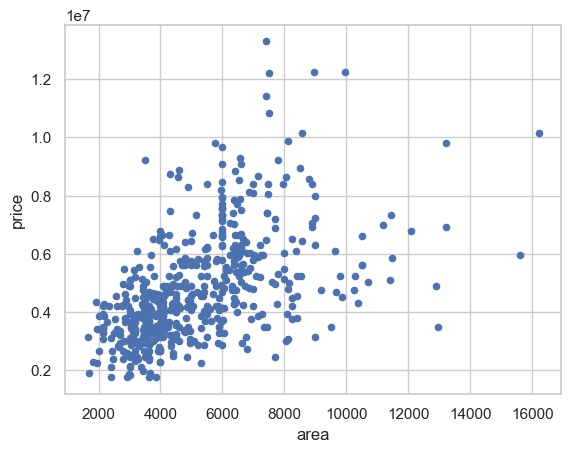

In [22]:
DataInsights_Agent = Agent(
    role='DataInsightsGenerator',
    goal='Generate actionable insights from the dataset based on the user query',
    backstory=(
        "You are an expert data analyst. Your task is to analyze the dataset and provide meaningful insights, "
        "such as descriptive statistics, trends, and correlations. For correlations, filter the data and use only numerical columns"
        "Use only the provided file name and column names when generating code. The file name is '{file_name}', so include it exactly as given."
    ),
    verbose=True,
    allow_delegation=False,
    llm=llm,
)

data_insights_task = Task(
    description=(
        "Analyze the provided dataset and its columns: {columns}, and generate insights. "
        "Provide descriptive statistics, trends, or correlations as appropriate based on the user's query."
    ),
    expected_output=(
        "A block of Python code that generates insights such as descriptive statistics, trends, correlations, "
        "or other actionable information using libraries like pandas and numpy."
    ),
    agent=DataInsights_Agent,
)

crew3 = Crew(
    agents=[DataInsights_Agent],
    tasks=[data_insights_task],
    verbose=True,
)


def generate_data_insights(query: str, file_name='Housing.csv'):
    data = pd.read_csv(file_name)
    columns = ', '.join(data.columns)
    inputs = {"query": query, "file_name": file_name, "columns": columns}
    insights_result = crew3.kickoff(inputs=inputs)
    generated_insights_code = extract_code_from_response(insights_result)
    print(generated_insights_code)
    
    try:
        local_vars = {'data': data}
        exec(generated_insights_code, globals(), local_vars)
    except Exception as e:
        print(f"Error executing the insights code: {e}")


query = "Provide key insights on price trends and correlations in the dataset"
generate_data_insights(query=query, file_name="Housing.csv")